# 1. Installation

In [1]:
!python -m pip install pyyaml==5.1
# Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# so we install from source instead. This takes a few minutes.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install pre-built detectron2 that matches pytorch version, if released:
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 4.9 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=d5486a2ae6e7e8d28764c1da8024b0930ded0c6e8244cf72b9338cc399d6081c
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-fsfwvg8a
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-fsfwvg8a
     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 79 kB 

In [2]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
torch:  1.12 ; cuda:  cu113
detectron2: 0.6


# 2. Import Libraries

In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [4]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')

Mounted at /content/drive


# 3. Import image with person

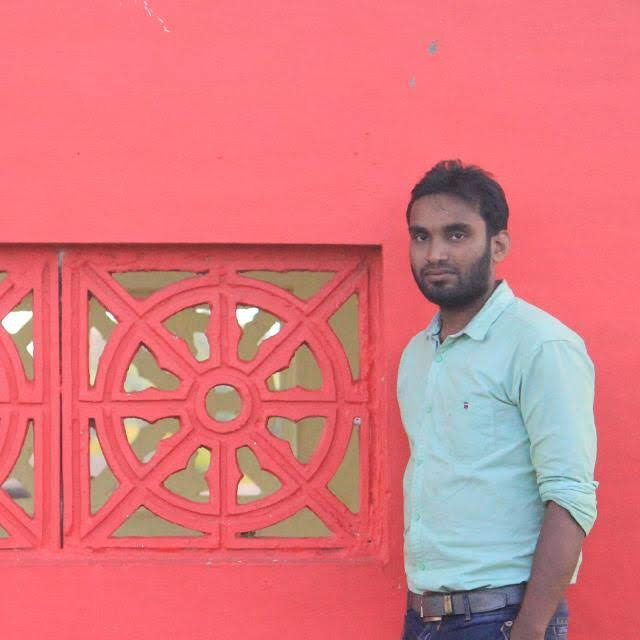

In [5]:
im = cv2.imread("/content/drive/My Drive/Human segmentation/man3.jpg")
cv2_imshow(im)

# 4. Load the pre-trained model on COCO dataset

In [6]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)


model_final_f10217.pkl: 178MB [00:03, 45.4MB/s]                           


# 5. Predict the classes in the given image

In [7]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs = predictor(im)
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([0], device='cuda:0')
Boxes(tensor([[393.8209, 161.6757, 600.7325, 638.5472]], device='cuda:0'))


/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


# 6. visualize the predicted image segment classes

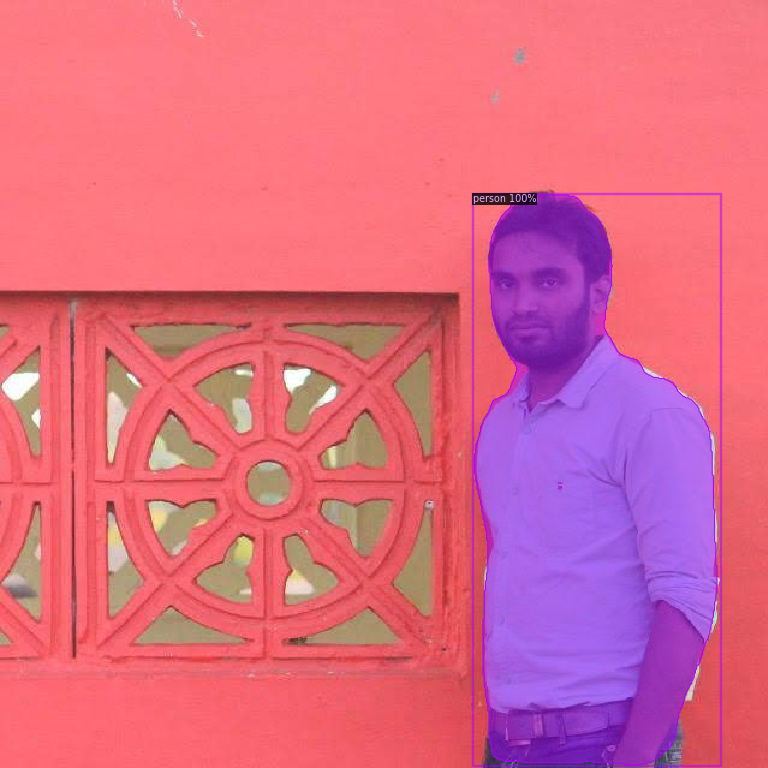

In [8]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [9]:
classes = ['person', 'bicycle', 'car', 'motorcycle', 'airplane',
                 'bus', 'train', 'truck', 'boat', 'traffic light',
                 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
                 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
                 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
                 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
                 'kite', 'baseball bat', 'baseball glove', 'skateboard',
                 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
                 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
                 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
                 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
                 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
                 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
                 'teddy bear', 'hair drier', 'toothbrush']

# 7. Change the background with another image if the image has a person

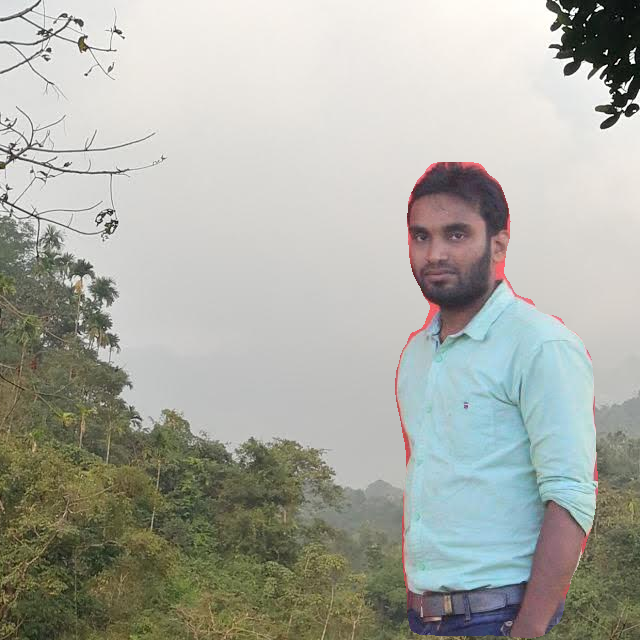

In [10]:
mask_class = classes[outputs['instances'].pred_classes[0]]
bg = cv2.imread('/content/drive/My Drive/Human segmentation/bg2.jpg')

def xyxy_to_xywh(box):
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])
    w = x2-x1
    h = y2-y1
    return [x1,y1,w,h]

if mask_class == 'person':
  mask = outputs['instances'].pred_masks[0]
  img = cv2.cvtColor(im, cv2.COLOR_RGB2RGBA)
  bg = cv2.cvtColor(bg[640:,320:,:], cv2.COLOR_RGB2RGBA) #Back ground image is cropped to appropriate size
  x=0
  y=0
  for line in mask:
      for column in line:
          if not column:
              img[x,y] = bg[x,y]
          y+=1
      y=0
      x+=1
      
  # Cropping image to the size of the objects bounding box
cv2_imshow(img)

In [15]:
cv2.imwrite('/content/drive/My Drive/Human segmentation/human_segmented_bg_changed.jpg',img)

True

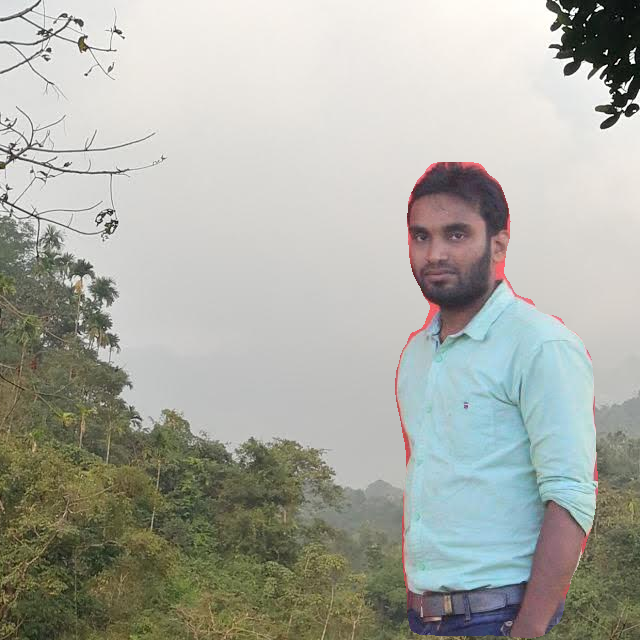

In [77]:
cv2_imshow(img)

# 8. Detect the position of face in the new image using Haarcascade

In [114]:
#Detect the face
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
frame = img
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5, flags=cv2.CASCADE_SCALE_IMAGE)

for (x, y, w, h) in faces:
    print("x :",x," y : ",y," w: ",w," h: ",h)

x : 391  y :  198  w:  99  h:  99


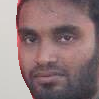

In [40]:
cv2_imshow(img[y:y+h,x:x+h,:])

# 9. Import hat.png and resize it proportioanately to the size of face

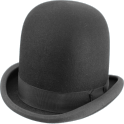

In [122]:
# Import png image of the hat
overlay = cv2.imread('/content/drive/My Drive/Human segmentation/hat.png',cv2.IMREAD_UNCHANGED)
hatwidth = w+round((w*0.25))
hatheight = h+round((h*0.25))
overlay = cv2.resize(overlay, (hatwidth,hatheight), interpolation = cv2.INTER_AREA)
#imghat = imghat[:,:,0:3]

cv2_imshow(overlay)

# 11. Place the hat above the face

In [ ]:
alpha_mask = np.dstack((alpha_channel, alpha_channel, alpha_channel))
h1, w1 = overlay.shape[:2]
background_subsection = background[0:h1, 0:w1]
combined = background_subsection * (1 - alpha_mask) + overlay_colors * alpha_mask
cv2_imshow(combined)

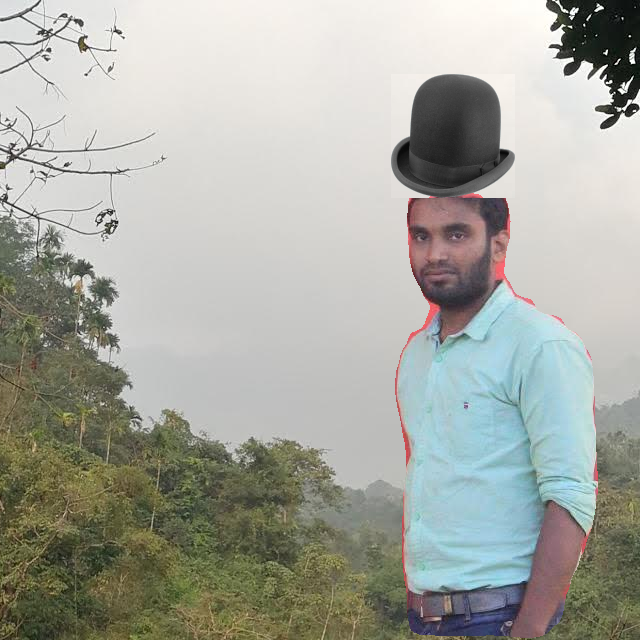

In [121]:
img[y-h1:y,x:x+h1,:3] = combined
cv2_imshow(img)

In [123]:
cv2.imwrite('/content/drive/My Drive/Human segmentation/final_output_image.jpg',img)

True